In [17]:
!pip install pandas
!pip install numpy
!pip install ipython-sql
!pip install matplotlib
!pip install pandas sqlalchemy ipython-sql
!pip install seaborn

In [221]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 2.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 452.1 kB/s eta 0:00:0000:0100:03


In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
import csv, sqlite3
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [7]:
df1=pd.read_csv('/Users/francescaparrella/analysis_projects/nba/nba22_rookie_stats.csv')
df2=pd.read_csv('/Users/francescaparrella/analysis_projects/nba/nba23_rookie_stats_correct.csv')
df3=pd.read_csv('/Users/francescaparrella/analysis_projects/nba/nba22_rookie_value_cleaned.csv')

In [ ]:
merged_df1 = pd.merge(df1, df2, on=['Player', 'Nationality'], suffixes=('_2022', '_2023'))
merged_df1
df=pd.merge(merged_df1, df3, on=['Player', 'Nationality'])
df

In [136]:
df.head(30)

,Player,Nationality,Age_2022,Team_2022,Games_2022,Rebounds_2022,Assists_2022,Steals_2022,Points per game_2022,Player Efficiency_2022,...,Points per game_2023,Player Efficiency_2023,True Shooting_2023,Win Shares_2023,BPM_2023,Round,Years Contract,Value,Average Annual Value,ROI
10,Walker Kessler,United States,21,UTA,74.0,8.4,0.9,0.4,9.2,21.5,...,8.1,18.0,0.663,4.1,0.9,1,4,13372418,3343105,-99.999462
12,Mark Williams,United States,21,CHO,43.0,7.1,0.4,0.7,9.0,19.8,...,12.7,22.5,0.675,2.1,0.8,1,4,18001011,4500253,-99.999500
11,Jalen Duren,United States,19,DET,67.0,8.9,1.1,0.7,9.1,17.3,...,13.8,18.7,0.653,4.8,-0.1,1,4,19474944,4868736,-99.999616
3,Jalen Williams,United States,21,OKC,75.0,4.5,3.3,1.4,14.1,15.6,...,19.1,19.1,0.621,7.3,2.3,1,4,20256917,5064229,-99.999623
9,Tari Eason,United States,21,HOU,82.0,6.0,1.1,1.2,9.3,15.2,...,9.8,17.1,0.528,1.3,1.6,1,4,16257246,4064312,-99.999579
0,Paolo Banchero,United States,20,ORL,72.0,6.9,3.7,0.8,20.0,14.9,...,22.6,17.3,0.546,5.3,1.3,1,4,50158769,12539692,-99.999862
27,Dalen Terry,United States,20,CHI,38.0,1.0,0.6,0.3,2.2,14.1,...,3.1,10.2,0.512,0.8,-2.3,1,4,15451758,3862940,-99.999736
1,Bennedict Mathurin,Canada,20,IND,78.0,4.1,1.5,0.6,16.7,13.1,...,14.5,13.0,0.562,1.4,-3.4,1,4,29936173,7484043,-99.999826
25,Peyton Watson,United States,20,DEN,23.0,1.6,0.5,0.1,3.3,12.8,...,6.7,11.8,0.539,2.5,-2.2,1,4,11267516,2816879,-99.999581
13,AJ Griffin,United States,19,ATL,72.0,2.1,1.0,0.6,8.9,12.6,...,2.4,1.2,0.382,-0.4,-9.6,1,4,17106137,4276534,-99.999972


In [137]:
df.reset_index(drop=True, inplace=True)

In [139]:
df.head(5)

,Player,Nationality,Age_2022,Team_2022,Games_2022,Rebounds_2022,Assists_2022,Steals_2022,Points per game_2022,Player Efficiency_2022,...,Points per game_2023,Player Efficiency_2023,True Shooting_2023,Win Shares_2023,BPM_2023,Round,Years Contract,Value,Average Annual Value,ROI
0,Walker Kessler,United States,21,UTA,74.0,8.4,0.9,0.4,9.2,21.5,...,8.1,18.0,0.663,4.1,0.9,1,4,13372418,3343105,-99.999462
1,Mark Williams,United States,21,CHO,43.0,7.1,0.4,0.7,9.0,19.8,...,12.7,22.5,0.675,2.1,0.8,1,4,18001011,4500253,-99.999500
2,Jalen Duren,United States,19,DET,67.0,8.9,1.1,0.7,9.1,17.3,...,13.8,18.7,0.653,4.8,-0.1,1,4,19474944,4868736,-99.999616
3,Jalen Williams,United States,21,OKC,75.0,4.5,3.3,1.4,14.1,15.6,...,19.1,19.1,0.621,7.3,2.3,1,4,20256917,5064229,-99.999623
4,Tari Eason,United States,21,HOU,82.0,6.0,1.1,1.2,9.3,15.2,...,9.8,17.1,0.528,1.3,1.6,1,4,16257246,4064312,-99.999579


In [126]:
top5_22_per = df.nlargest(5, 'Player Efficiency_2022')

top5_23_per = df[['Player', 'Player Efficiency_2023']][df['Player'].isin(top5_22_per['Player'])]

# Create a comparison DataFrame
comparison_data1 = pd.merge(
    top5_22_per[['Player', 'Player Efficiency_2022']],
    top5_23_per,
    on='Player',
    how='inner'  # Use inner join to keep only players present in both years
)

# Print the comparison_data to check for correctness
print(comparison_data1)

           Player  Player Efficiency_2022  Player Efficiency_2023
0  Walker Kessler                    21.5                    18.0
1   Mark Williams                    19.8                    22.5
2     Jalen Duren                    17.3                    18.7
3  Jalen Williams                    15.6                    19.1
4      Tari Eason                    15.2                    17.1


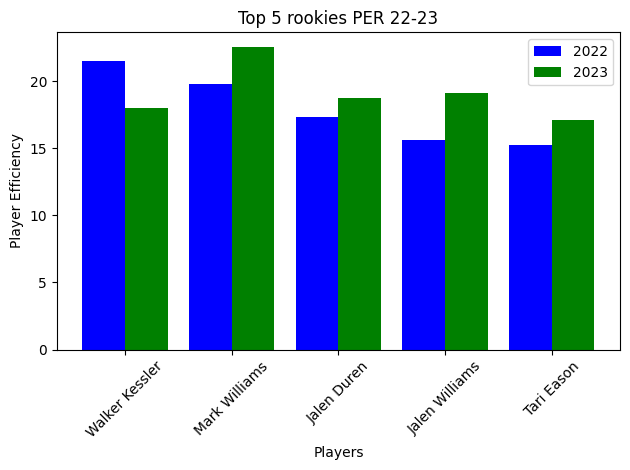

In [128]:
x = range(len(comparison_data1))

# Create a bar plot
plt.bar(x, comparison_data1['Player Efficiency_2022'], width=0.4, label='2022', color='b', align='center')
plt.bar([p + 0.4 for p in x], comparison_data1['Player Efficiency_2023'], width=0.4, label='2023', color='g', align='center')

# Add labels and title
plt.xlabel('Players')
plt.ylabel('Player Efficiency')
plt.title('Top 5 rookies PER 22-23')
plt.xticks([p + 0.2 for p in x], comparison_data1['Player'], rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [119]:
top5_22_p

,Player,Nationality,Age_2022,Team_2022,Games_2022,Rebounds_2022,Assists_2022,Steals_2022,Points per game_2022,Player Efficiency_2022,...,Steals_2023,Points per game_2023,Player Efficiency_2023,True Shooting_2023,Win Shares_2023,BPM_2023,Round,Years Contract,Value,Average Annual Value
0,Paolo Banchero,United States,20,ORL,72.0,6.9,3.7,0.8,20.0,14.9,...,0.9,22.6,17.3,0.546,5.3,1.3,1,4,50158769,12539692
1,Bennedict Mathurin,Canada,20,IND,78.0,4.1,1.5,0.6,16.7,13.1,...,0.6,14.5,13.0,0.562,1.4,-3.4,1,4,29936173,7484043
2,Jaden Ivey,United States,20,DET,74.0,3.9,5.2,0.8,16.3,12.1,...,0.7,15.4,12.4,0.536,0.5,-3.1,1,4,32951083,8237771
3,Jalen Williams,United States,21,OKC,75.0,4.5,3.3,1.4,14.1,15.6,...,1.1,19.1,19.1,0.621,7.3,2.3,1,4,20256917,5064229
4,Jabari Smith Jr,United States,19,HOU,79.0,7.2,1.3,0.5,12.8,11.2,...,0.7,13.7,13.8,0.571,5.6,-0.4,1,4,40330432,10082608


In [123]:
top5_22_p = df.nlargest(5, 'Points per game_2022')

top5_23_p = df[['Player', 'Points per game_2023']][df['Player'].isin(top5_22_p['Player'])]

# Create a comparison DataFrame
comparison_data = pd.merge(
    top5_22_p[['Player', 'Points per game_2022']],
    top5_23_p,
    on='Player',
    how='inner'  # Use inner join to keep only players present in both years
)

# Print the comparison_data to check for correctness
print(comparison_data)

               Player  Points per game_2022  Points per game_2023
0      Paolo Banchero                  20.0                  22.6
1  Bennedict Mathurin                  16.7                  14.5
2          Jaden Ivey                  16.3                  15.4
3      Jalen Williams                  14.1                  19.1
4     Jabari Smith Jr                  12.8                  13.7


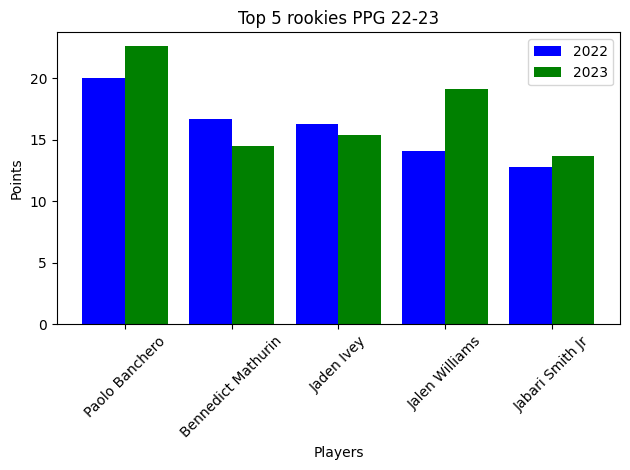

In [125]:
x = range(len(comparison_data))

# Create a bar plot
plt.bar(x, comparison_data['Points per game_2022'], width=0.4, label='2022', color='b', align='center')
plt.bar([p + 0.4 for p in x], comparison_data['Points per game_2023'], width=0.4, label='2023', color='g', align='center')

# Add labels and title
plt.xlabel('Players')
plt.ylabel('Points')
plt.title('Top 5 rookies PPG 22-23')
plt.xticks([p + 0.2 for p in x], comparison_data['Player'], rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

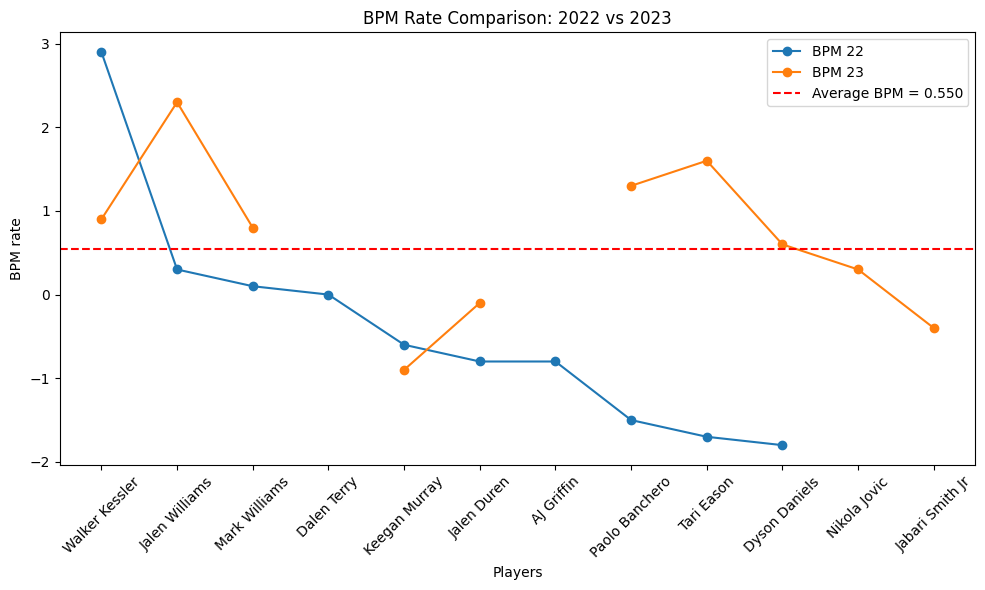

In [97]:
top10_22 = df.nlargest(10, 'BPM_2022')[['Player', 'BPM_2022']]
top10_23 = df.nlargest(10, 'BPM_2023')[['Player', 'BPM_2023']]

# Merge the two DataFrames on the Player column
merged_top10 = pd.merge(top10_22, top10_23, on='Player', how='outer')

plt.figure(figsize=(10, 6))

y=merged_top10['BPM_2022']
x=merged_top10['Player']
plt.plot(x, y, marker='o', label='BPM 22')

y1=merged_top10['BPM_2023']
x1=merged_top10['Player']
plt.plot(x1, y1, marker='o', label='BPM 23')
plt.axhline(y=0.550, color='r', linestyle='--', label='Average BPM = 0.550')

plt.title('BPM Rate Comparison: 2022 vs 2023')
plt.xlabel('Players')
plt.ylabel('BPM rate')
plt.xticks(range(len(merged_top10['Player'])), merged_top10['Player'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

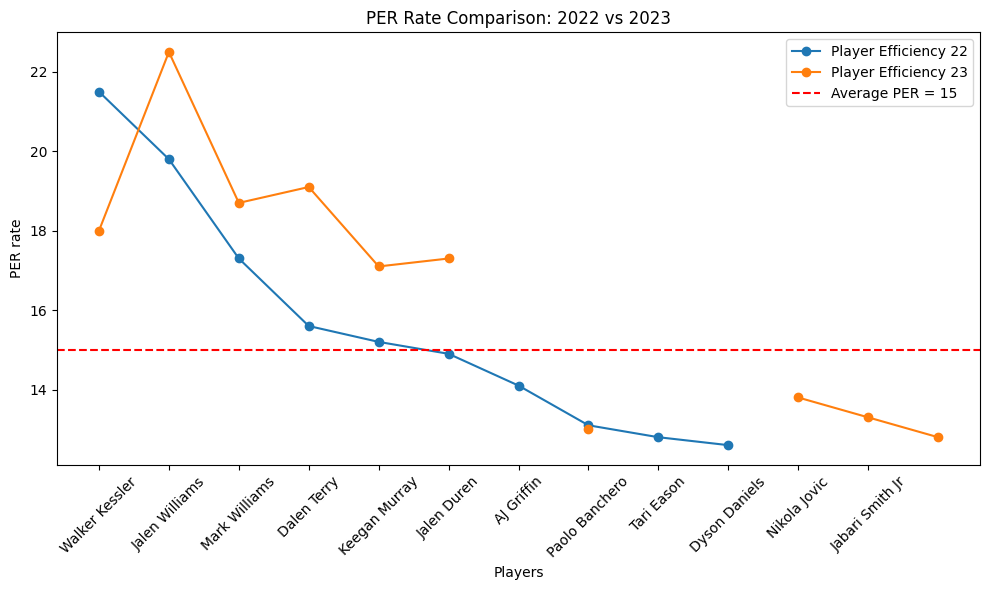

In [107]:
top10_22_per = df.nlargest(10, 'Player Efficiency_2022')[['Player', 'Player Efficiency_2022']]
top10_23_per = df.nlargest(10, 'Player Efficiency_2023')[['Player', 'Player Efficiency_2023']]

# Merge the two DataFrames on the Player column
merged_top10_per = pd.merge(top10_22_per, top10_23_per, on='Player', how='outer')

plt.figure(figsize=(10, 6))

y=merged_top10_per['Player Efficiency_2022']
x=merged_top10_per['Player']
plt.plot(x, y, marker='o', label='Player Efficiency 22')

y1=merged_top10_per['Player Efficiency_2023']
x1=merged_top10_per['Player']
plt.plot(x1, y1, marker='o', label='Player Efficiency 23')
plt.axhline(y=15, color='r', linestyle='--', label='Average PER = 15')

plt.title('PER Rate Comparison: 2022 vs 2023')
plt.xlabel('Players')
plt.ylabel('PER rate')
plt.xticks(range(len(merged_top10['Player'])), merged_top10['Player'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [99]:
merged_top10

,Player,BPM_2022,BPM_2023
0,Walker Kessler,2.9,0.9
1,Jalen Williams,0.3,2.3
2,Mark Williams,0.1,0.8
3,Dalen Terry,0.0,NaN
4,Keegan Murray,-0.6,-0.9
5,Jalen Duren,-0.8,-0.1
6,AJ Griffin,-0.8,NaN
7,Paolo Banchero,-1.5,1.3
8,Tari Eason,-1.7,1.6
9,Dyson Daniels,-1.8,0.6


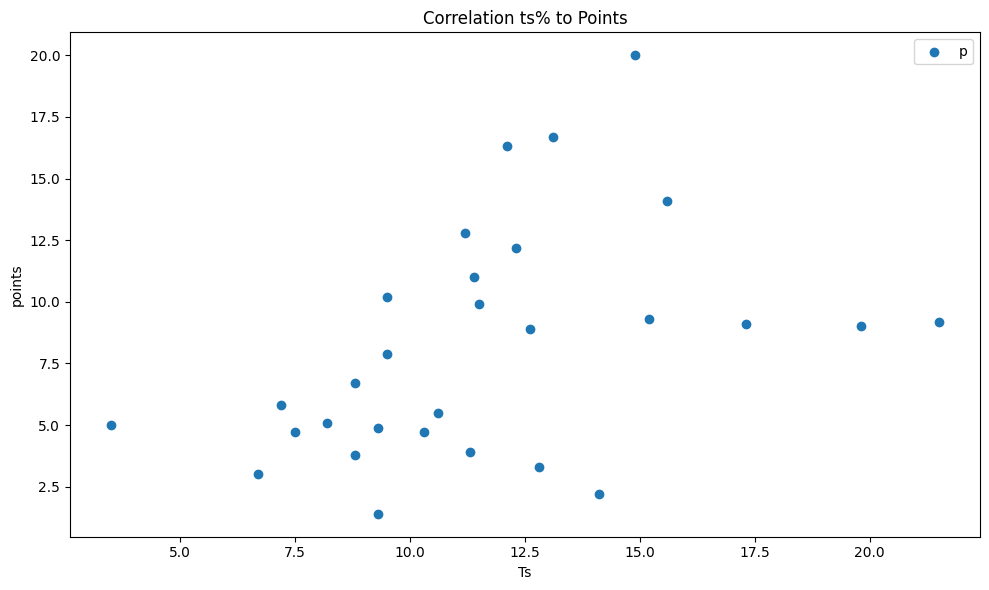

In [101]:
plt.figure(figsize=(10, 6))

plt.scatter(df['True Shooting_2022'], df['Points per game_2022'], label='p')

plt.title('Correlation ts% to Points')
plt.xlabel('Ts')
plt.ylabel('points')
plt.legend()
plt.tight_layout()
plt.show()

In [104]:
correlation = df['Age_2022'].corr(df['Points per game_2022'])
print("Correlation between aget and game points:", correlation)

Correlation between aget and game points: -0.06929547124426401


In [147]:
# CALCULATE THE ROI
# 1. normalize the data
df['norm_per_22']=df['Player Efficiency_2022']/df['Player Efficiency_2022'].max()
df['norm_ppg_22']=df['Points per game_2022']/df['Points per game_2022'].max()
df['norm_ws_22']=df['Win Shares_2022']/df['Win Shares_2022'].max()

df['norm_per_23']=df['Player Efficiency_2023']/df['Player Efficiency_2023'].max()
df['norm_ppg_23']=df['Points per game_2023']/df['Points per game_2023'].max()
df['norm_ws_23']=df['Win Shares_2023']/df['Win Shares_2023'].max()

min_bpm_22=df['BPM_2022'].min()
max_bpm_22=df['BPM_2022'].max()

df['norm_bpm_22']=(df['BPM_2022'] - min_bpm_22) / ( max_bpm_22 - min_bpm_22)

min_bpm_23=df['BPM_2023'].min()
max_bpm_23=df['BPM_2023'].max()

df['norm_bpm_23']=(df['BPM_2023'] - min_bpm_23) / ( max_bpm_23 - min_bpm_23)

df['Total_Performance_22_23'] = (df['norm_per_22'] + 
                                 df['norm_ppg_22'] + 
                                 df['norm_ws_22'] + 
                                 df['norm_bpm_22'] +
                                 df['norm_per_23'] + 
                                 df['norm_ppg_23'] + 
                                 df['norm_ws_23'] + 
                                 df['norm_bpm_23'])

df['norm_per_22']=df['norm_per_22'].round(2)
df['norm_ppg_22']=df['norm_ppg_22'].round(2)
df['norm_ws_22']=df['norm_ws_22'].round(2)  
df['norm_bpm_22']=df['norm_bpm_22'].round(2) 
df['norm_per_23']=df['norm_per_23'].round(2) 
df['norm_ppg_23']=df['norm_ppg_23'].round(2)
df['norm_ws_23']=df['norm_ws_23'].round(2)
df['norm_bpm_23']=df['norm_bpm_23'].round(2)
df['Total_Performance_22_23']=df['Total_Performance_22_23'].round(2)
df.head()

,Player,Nationality,Age_2022,Team_2022,Games_2022,Rebounds_2022,Assists_2022,Steals_2022,Points per game_2022,Player Efficiency_2022,...,ROI,norm_per_22,norm_ppg_22,norm_ws_22,norm_per_23,norm_ppg_23,norm_ws_23,norm_bpm_22,norm_bpm_23,Total_Performance_22_23
0,Walker Kessler,United States,21,UTA,74.0,8.4,0.9,0.4,9.2,21.5,...,-99.999462,1.00,0.46,1.00,0.80,0.36,0.56,1.00,0.88,6.06
1,Mark Williams,United States,21,CHO,43.0,7.1,0.4,0.7,9.0,19.8,...,-99.999500,0.92,0.45,0.39,1.00,0.56,0.29,0.78,0.87,5.26
2,Jalen Duren,United States,19,DET,67.0,8.9,1.1,0.7,9.1,17.3,...,-99.999616,0.80,0.45,0.63,0.83,0.61,0.66,0.70,0.80,5.50
3,Jalen Williams,United States,21,OKC,75.0,4.5,3.3,1.4,14.1,15.6,...,-99.999623,0.73,0.70,0.79,0.85,0.85,1.00,0.79,1.00,6.71
4,Tari Eason,United States,21,HOU,82.0,6.0,1.1,1.2,9.3,15.2,...,-99.999579,0.71,0.46,0.37,0.76,0.43,0.18,0.63,0.94,4.48


In [184]:
#calculate the ROI with logarithm on AAV
df['ROI'] = (df['Total_Performance_22_23'] - np.log(df['Average Annual Value'])) / np.log(df['Average Annual Value']) * 100
df['ROI']=df['ROI'].round(2)

df['Adjusted_ROI']=df['ROI'] + 100
df['Adjusted_ROI']

0     40.34
1     34.34
2     35.72
3     43.46
4     29.44
5     37.26
6     19.25
7     25.90
8     21.08
9     14.08
10    32.52
11    23.42
12    22.56
13    21.13
14    15.99
15    28.90
16    22.12
17    23.45
18    17.97
19    15.78
20    15.83
21    14.03
22    22.04
23    16.74
24    15.64
25     8.08
26     9.09
27    18.45
28     9.51
Name: Adjusted_ROI, dtype: float64

In [187]:
top7_ROI=df.nlargest(7, 'Adjusted_ROI')
top7_ROI

,Player,Nationality,Age_2022,Team_2022,Games_2022,Rebounds_2022,Assists_2022,Steals_2022,Points per game_2022,Player Efficiency_2022,...,norm_per_22,norm_ppg_22,norm_ws_22,norm_per_23,norm_ppg_23,norm_ws_23,norm_bpm_22,norm_bpm_23,Total_Performance_22_23,Adjusted_ROI
3,Jalen Williams,United States,21,OKC,75.0,4.5,3.3,1.4,14.1,15.6,...,0.73,0.70,0.79,0.85,0.85,1.00,0.79,1.00,6.71,43.46
0,Walker Kessler,United States,21,UTA,74.0,8.4,0.9,0.4,9.2,21.5,...,1.00,0.46,1.00,0.80,0.36,0.56,1.00,0.88,6.06,40.34
5,Paolo Banchero,United States,20,ORL,72.0,6.9,3.7,0.8,20.0,14.9,...,0.69,1.00,0.34,0.77,1.00,0.73,0.65,0.92,6.09,37.26
2,Jalen Duren,United States,19,DET,67.0,8.9,1.1,0.7,9.1,17.3,...,0.80,0.45,0.63,0.83,0.61,0.66,0.70,0.80,5.50,35.72
1,Mark Williams,United States,21,CHO,43.0,7.1,0.4,0.7,9.0,19.8,...,0.92,0.45,0.39,1.00,0.56,0.29,0.78,0.87,5.26,34.34
10,Keegan Murray,United States,22,SAC,80.0,4.6,1.2,0.8,12.2,12.3,...,0.57,0.61,0.61,0.59,0.67,0.71,0.72,0.73,5.21,32.52
4,Tari Eason,United States,21,HOU,82.0,6.0,1.1,1.2,9.3,15.2,...,0.71,0.46,0.37,0.76,0.43,0.18,0.63,0.94,4.48,29.44


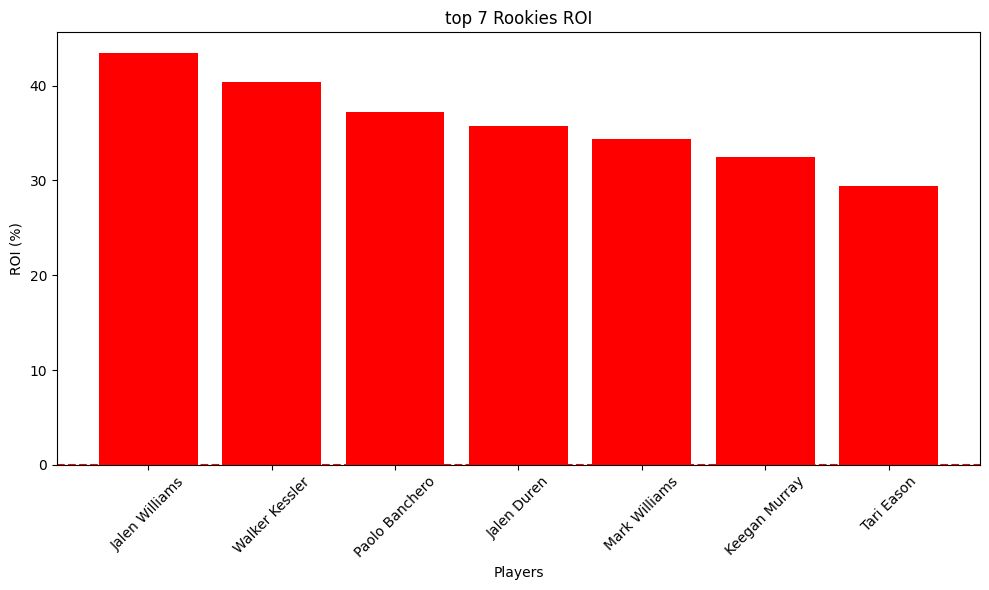

In [191]:
# Plotting the ROI
plt.figure(figsize=(10, 6))
plt.bar(top7_ROI['Player'], top7_ROI['Adjusted_ROI'], color='red')
plt.axhline(0, color='red', linestyle='--')  # Average line at 0%
plt.title('top 7 Rookies ROI')
plt.xlabel('Players')
plt.ylabel('ROI (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [193]:
top7_perf=df.nlargest(7, 'Total_Performance_22_23')
top7_perf

,Player,Nationality,Age_2022,Team_2022,Games_2022,Rebounds_2022,Assists_2022,Steals_2022,Points per game_2022,Player Efficiency_2022,...,norm_per_22,norm_ppg_22,norm_ws_22,norm_per_23,norm_ppg_23,norm_ws_23,norm_bpm_22,norm_bpm_23,Total_Performance_22_23,Adjusted_ROI
3,Jalen Williams,United States,21,OKC,75.0,4.5,3.3,1.4,14.1,15.6,...,0.73,0.70,0.79,0.85,0.85,1.00,0.79,1.00,6.71,43.46
5,Paolo Banchero,United States,20,ORL,72.0,6.9,3.7,0.8,20.0,14.9,...,0.69,1.00,0.34,0.77,1.00,0.73,0.65,0.92,6.09,37.26
0,Walker Kessler,United States,21,UTA,74.0,8.4,0.9,0.4,9.2,21.5,...,1.00,0.46,1.00,0.80,0.36,0.56,1.00,0.88,6.06,40.34
2,Jalen Duren,United States,19,DET,67.0,8.9,1.1,0.7,9.1,17.3,...,0.80,0.45,0.63,0.83,0.61,0.66,0.70,0.80,5.50,35.72
1,Mark Williams,United States,21,CHO,43.0,7.1,0.4,0.7,9.0,19.8,...,0.92,0.45,0.39,1.00,0.56,0.29,0.78,0.87,5.26,34.34
10,Keegan Murray,United States,22,SAC,80.0,4.6,1.2,0.8,12.2,12.3,...,0.57,0.61,0.61,0.59,0.67,0.71,0.72,0.73,5.21,32.52
15,Jabari Smith Jr,United States,19,HOU,79.0,7.2,1.3,0.5,12.8,11.2,...,0.52,0.64,0.27,0.61,0.61,0.77,0.47,0.77,4.66,28.90


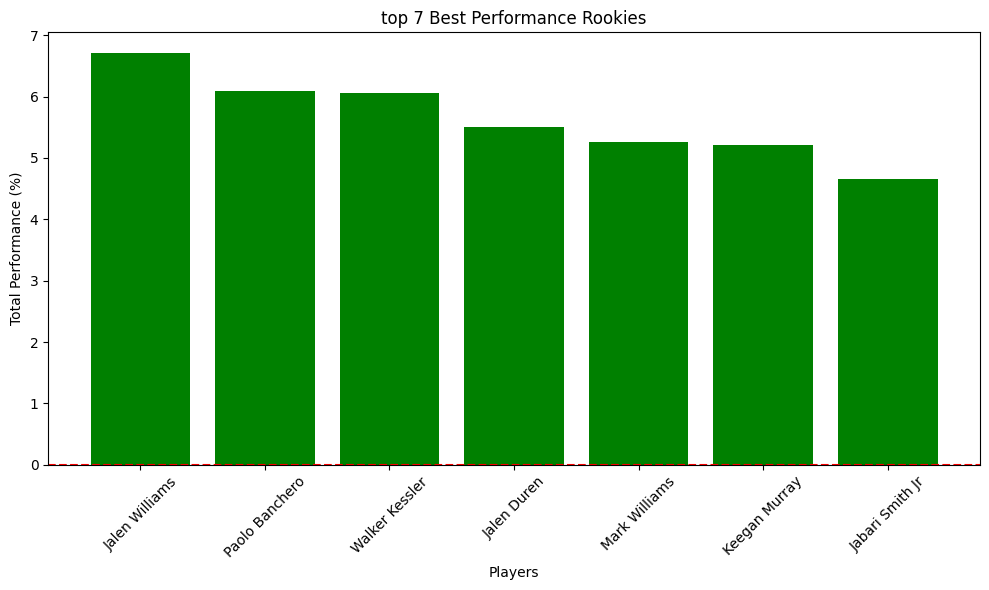

In [195]:
# Plotting the performance
plt.figure(figsize=(10, 6))
plt.bar(top7_perf['Player'], top7_perf['Total_Performance_22_23'], color='green')
plt.axhline(0, color='red', linestyle='--')  # Average line at 0%
plt.title('top 7 Best Performance Rookies')
plt.xlabel('Players')
plt.ylabel('Total Performance (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

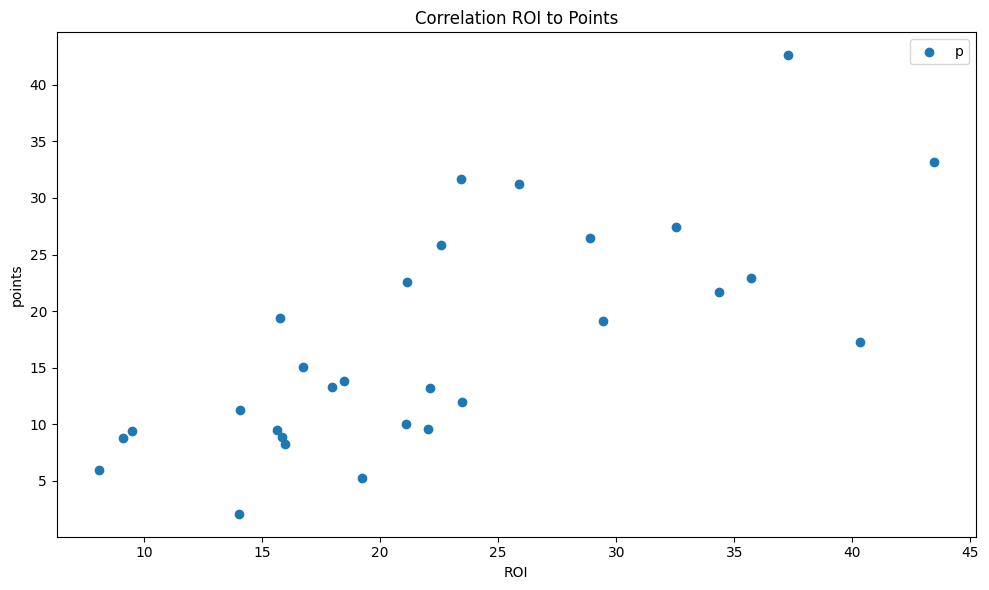

In [209]:
tot_points=df['Points per game_2022'] + df['Points per game_2023']

plt.figure(figsize=(10, 6))

plt.scatter(df['Adjusted_ROI'], tot_points, label='p')

plt.title('Correlation ROI to Points')
plt.xlabel('ROI')
plt.ylabel('points')
plt.legend()
plt.tight_layout()
plt.show()

In [210]:
correlation = df['Adjusted_ROI'].corr(tot_points)
print("Correlation between ROI and game points:", correlation)

Correlation between ROI and game points: 0.722846471225588


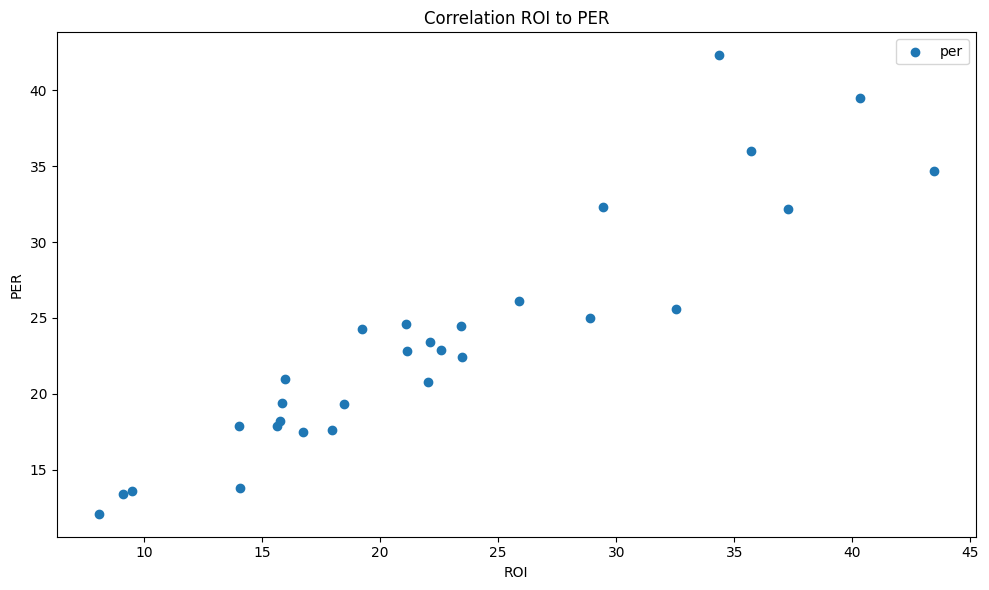

In [211]:
tot_per=df['Player Efficiency_2022'] + df['Player Efficiency_2023']

plt.figure(figsize=(10, 6))

plt.scatter(df['Adjusted_ROI'], tot_per, label='per')

plt.title('Correlation ROI to PER')
plt.xlabel('ROI')
plt.ylabel('PER')
plt.legend()
plt.tight_layout()
plt.show()

In [212]:
correlation = df['Adjusted_ROI'].corr(tot_per)
print("Correlation between ROI and Player Efficiency Rate:", correlation)

Correlation between ROI and Player Efficiency Rate: 0.925150195785907


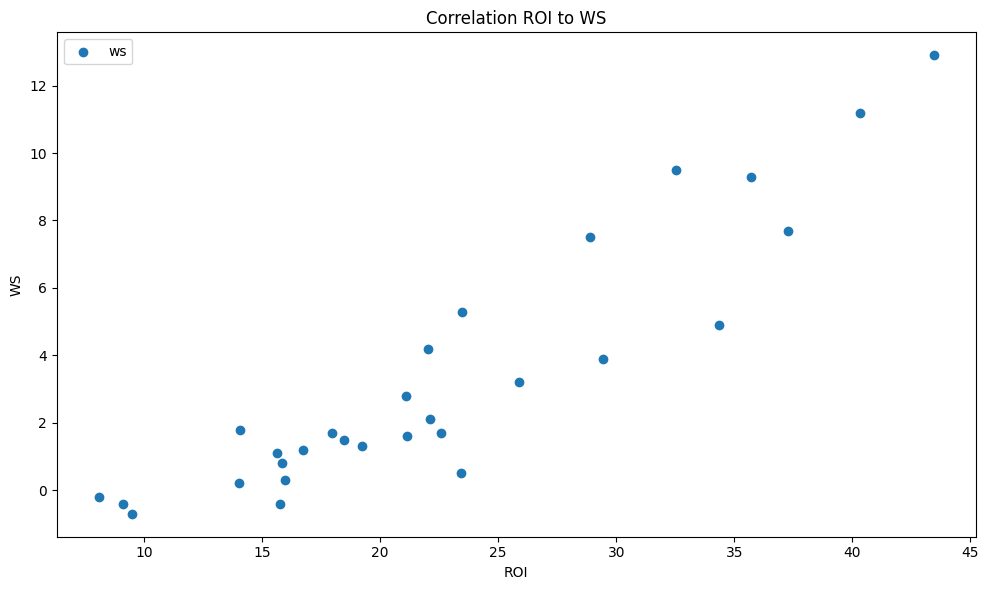

In [213]:
tot_ws=df['Win Shares_2022'] + df['Win Shares_2023']

plt.figure(figsize=(10, 6))

plt.scatter(df['Adjusted_ROI'], tot_ws, label='ws')

plt.title('Correlation ROI to WS')
plt.xlabel('ROI')
plt.ylabel('WS')
plt.legend()
plt.tight_layout()
plt.show()

In [214]:
correlation = df['Adjusted_ROI'].corr(tot_ws)
print("Correlation between ROI and Win Shares", correlation)

Correlation between ROI and Win Shares 0.919649356746426


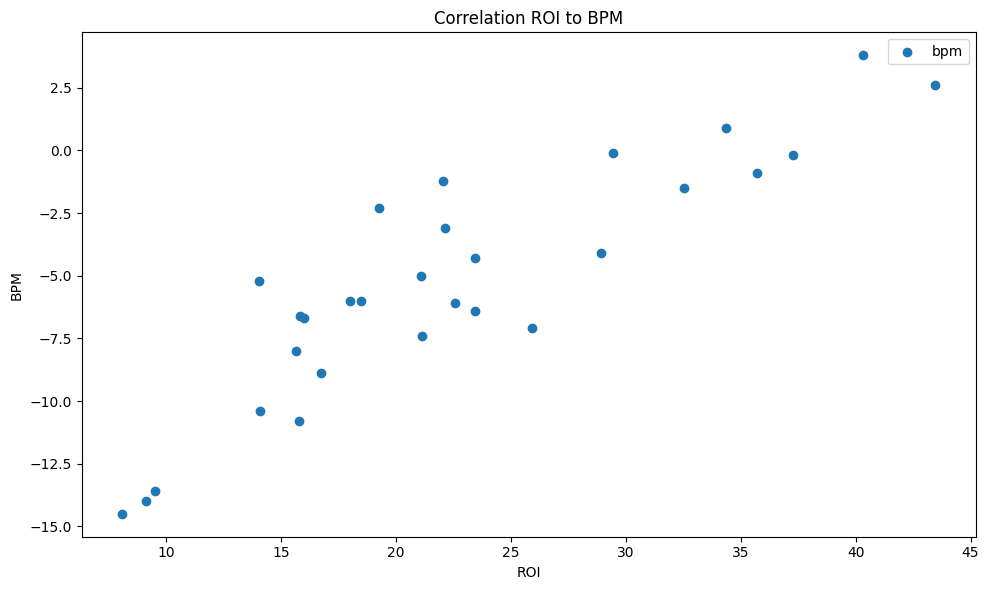

In [217]:
tot_bpm=df['BPM_2022'] + df['BPM_2023']

plt.figure(figsize=(10, 6))

plt.scatter(df['Adjusted_ROI'], tot_bpm, label='bpm')

plt.title('Correlation ROI to BPM')
plt.xlabel('ROI')
plt.ylabel('BPM')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
Roi_heat = sns.df.pivot(index="Model", columns="Player Efficiency", values="Adjusted ROI")
sns.heatmap(roi.heat)

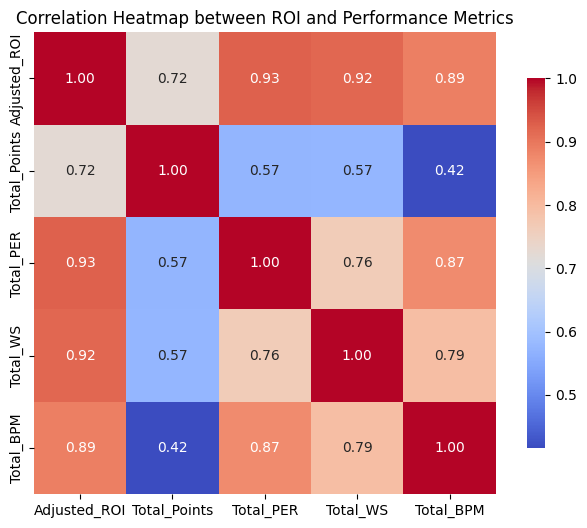

In [218]:
correlation_data = pd.DataFrame({
    'Adjusted_ROI': df['Adjusted_ROI'],
    'Total_Points': tot_points,
    'Total_PER': tot_per,
    'Total_WS': tot_ws,
    'Total_BPM': tot_bpm
})

correlation_matrix = correlation_data.corr()

# Step 2: Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})

# Step 3: Customize the heatmap
plt.title('Correlation Heatmap between ROI and Performance Metrics')
plt.show()

In [231]:
tot_ws=df['Win Shares_2022'] + df['Win Shares_2023']
df['Total_Win_Shares']=tot_ws

tot_per=df['Player Efficiency_2022'] + df['Player Efficiency_2023']
df['Total_Player_Efficiency']=tot_per

tot_ppg=df['Points per game_2022'] + df['Points per game_2023']
df['Total_Points_per_Game']=tot_ppg

tot_bpm=df['BPM_2022'] + df['BPM_2023']
df['Total_BPM']=tot_bpm

In [229]:
x= df[['Total_Win_Shares']]
y= df['Adjusted_ROI']

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.4, random_state=0)

model=LinearRegression()
model.fit(x_train,y_train)

score=model.score(x_test, y_test)
print(f'model score:{score}')

y_pred= model.predict(x_test)

mse=mean_squared_error(y_test, y_pred)
print(f'mean squared error:{mse}')

model score:0.8119378664143408
mean squared error:13.622981047126123


In [234]:
df.head(30)

,Player,Nationality,Age_2022,Team_2022,Games_2022,Rebounds_2022,Assists_2022,Steals_2022,Points per game_2022,Player Efficiency_2022,...,norm_ppg_23,norm_ws_23,norm_bpm_22,norm_bpm_23,Total_Performance_22_23,Adjusted_ROI,Total_Win_Shares,Total_Player_Efficiency,Total_Points_per_Game,Total_BPM
0,Walker Kessler,United States,21,UTA,74.0,8.4,0.9,0.4,9.2,21.5,...,0.36,0.56,1.00,0.88,6.06,40.34,11.2,39.5,17.3,3.8
1,Mark Williams,United States,21,CHO,43.0,7.1,0.4,0.7,9.0,19.8,...,0.56,0.29,0.78,0.87,5.26,34.34,4.9,42.3,21.7,0.9
2,Jalen Duren,United States,19,DET,67.0,8.9,1.1,0.7,9.1,17.3,...,0.61,0.66,0.70,0.80,5.50,35.72,9.3,36.0,22.9,-0.9
3,Jalen Williams,United States,21,OKC,75.0,4.5,3.3,1.4,14.1,15.6,...,0.85,1.00,0.79,1.00,6.71,43.46,12.9,34.7,33.2,2.6
4,Tari Eason,United States,21,HOU,82.0,6.0,1.1,1.2,9.3,15.2,...,0.43,0.18,0.63,0.94,4.48,29.44,3.9,32.3,19.1,-0.1
5,Paolo Banchero,United States,20,ORL,72.0,6.9,3.7,0.8,20.0,14.9,...,1.00,0.73,0.65,0.92,6.09,37.26,7.7,32.2,42.6,-0.2
6,Dalen Terry,United States,20,CHI,38.0,1.0,0.6,0.3,2.2,14.1,...,0.14,0.11,0.77,0.61,2.92,19.25,1.3,24.3,5.3,-2.3
7,Bennedict Mathurin,Canada,20,IND,78.0,4.1,1.5,0.6,16.7,13.1,...,0.64,0.19,0.47,0.52,4.10,25.90,3.2,26.1,31.2,-7.1
8,Peyton Watson,United States,20,DEN,23.0,1.6,0.5,0.1,3.3,12.8,...,0.30,0.34,0.54,0.62,3.13,21.08,2.8,24.6,10.0,-5.0
9,AJ Griffin,United States,19,ATL,72.0,2.1,1.0,0.6,8.9,12.6,...,0.11,-0.05,0.70,0.00,2.15,14.08,1.8,13.8,11.3,-10.4


In [236]:
df.iloc[9]

Player                        AJ Griffin
Nationality                United States
Age_2022                              19
Team_2022                            ATL
Games_2022                          72.0
Rebounds_2022                        2.1
Assists_2022                         1.0
Steals_2022                          0.6
Points per game_2022                 8.9
Player Efficiency_2022              12.6
True Shooting_2022                 0.577
Win Shares_2022                      2.2
BPM_2022                            -0.8
Age_2023                              20
Team_2023                            ATL
Games_2023                          20.0
Rebounds_2023                        0.9
Assists_2023                         0.3
Steals_2023                          0.1
Points per game_2023                 2.4
Player Efficiency_2023               1.2
True Shooting_2023                 0.382
Win Shares_2023                     -0.4
BPM_2023                            -9.6
Round           

In [232]:
df.to_csv('nba_rookie_analysis.csv', index=False)